**Import pandas to import a CSV file:**

In [2]:
import pandas as pd
apple = pd.read_csv("drive/MyDrive/Datasets/AAPL.csv")
print(apple.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100600  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095352  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088353  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090540   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093165   73449600


**To get the number of training days:**

In [3]:
print("trainging days =",apple.shape)

trainging days = (10272, 7)


**To Visualize the close price Data:**

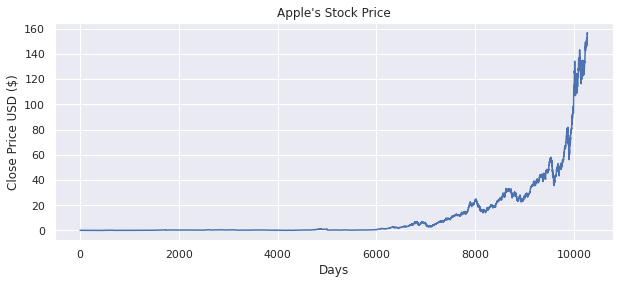

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.show()

**To get the close price:**

In [8]:
apple = apple[["Close"]]
print(apple.head())

      Close
0  0.128348
1  0.121652
2  0.112723
3  0.115513
4  0.118862


**Creating a variable to predict ‘X’ days in the future:**

In [9]:
futureDays = 25

**Create a new target column shifted ‘X’ units/days up:**

In [11]:
apple["Prediction"] = apple[["Close"]].shift(-futureDays)
print(apple.head())
print(apple.tail())

      Close  Prediction
0  0.128348    0.142299
1  0.121652    0.145089
2  0.112723    0.146763
3  0.115513    0.146205
4  0.118862    0.143973
            Close  Prediction
10267  152.509995         NaN
10268  153.649994         NaN
10269  154.300003         NaN
10270  156.690002         NaN
10271  155.110001         NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Create a new target column shifted ‘X’ units/days up:**

In [12]:
import numpy as np
x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[1.28348000e-01]
 [1.21652000e-01]
 [1.12723000e-01]
 ...
 [1.45860001e+02]
 [1.45520004e+02]
 [1.47360001e+02]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


**To create a target dataset (y) and convert it to a numpy array and get all of the target values except the last ‘x’ rows days:**

In [13]:
y = np.array(apple["Prediction"])[:-futureDays]
print(y)

[1.42299000e-01 1.45089000e-01 1.46763000e-01 ... 1.54300003e+02
 1.56690002e+02 1.55110001e+02]


# **Split the data into 75% training and 25% testing**

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

# **Creating Models**

In [15]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

**To get the last ‘x’ rows/days of the feature dataset:**

In [16]:
xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[136.330002]
 [136.960007]
 [137.270004]
 [139.960007]
 [142.020004]
 [144.570007]
 [143.240005]
 [145.110001]
 [144.5     ]
 [145.639999]
 [149.149994]
 [148.479996]
 [146.389999]
 [142.449997]
 [146.149994]
 [145.399994]
 [146.800003]
 [148.559998]
 [148.990005]
 [146.770004]
 [144.979996]
 [145.639999]
 [145.860001]
 [145.520004]
 [147.360001]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


# **To see the model tree prediction**

In [17]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [124.760002 147.059998 146.139999 146.089996 145.600006 145.860001
 148.889999 150.190002 145.860001 150.190002 146.360001 146.699997
 148.190002 149.710007 149.619995 150.190002 151.830002 148.600006
 153.119995 151.830002 145.860001 150.190002 154.300003 150.190002
 155.110001]


# **To see the model linear regression prediction**

In [18]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [140.87594392 141.52711099 141.84752089 144.62788195 146.75707491
 149.39273332 148.01805613 149.95086589 149.32037477 150.4986667
 154.12656355 153.43406011 151.27385944 147.20151151 151.02579259
 150.25059985 151.6976356  153.5167494  153.96120047 151.66662893
 149.81649399 150.4986667  150.72605863 150.37464103 152.27644411]


# **Visualize decision tree predictions**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


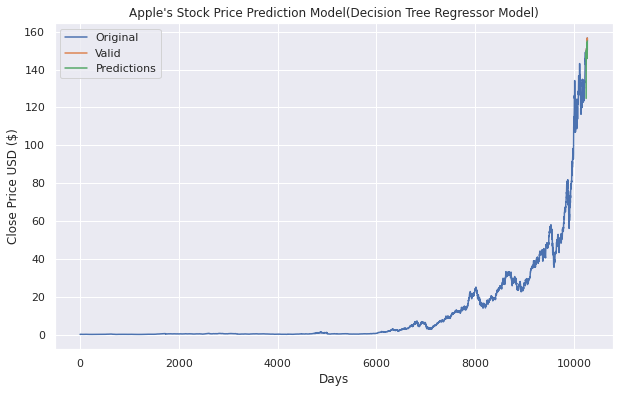

In [21]:
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

# **Visualize the linear model predictions**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


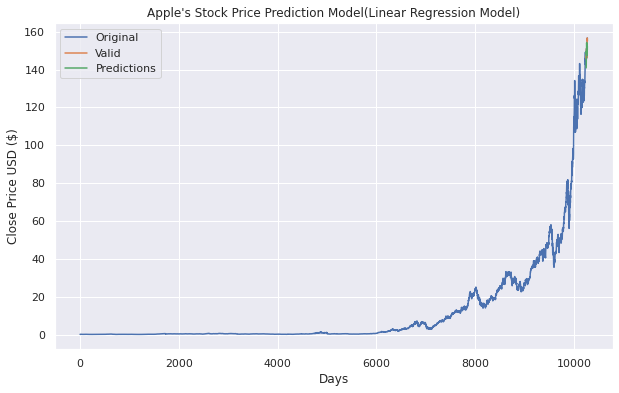

In [22]:
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()